Gradient Descent

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

In [5]:
xc = tf.constant([[2, 2], [3, 3]])
yc = tf.constant([[8, 16], [2, 3]])
print(str(tf.pow(xc, yc)))

Tensor("Pow_2:0", shape=(2, 2), dtype=int32)


In [3]:
area = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
price = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

n_samples = area.shape[0]

In [7]:
n_samples

17

In [3]:
'''
Step 0: Suppress warning logs
'''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

''' 
Step 1: Read in data from the .xls file
'''
DATA_FILE = 'data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0) #Sheet 1

number_of_rows = len(list(sheet.get_rows())) #จำนวน Row
data = np.asarray([sheet.row_values(i) for i in range(1, number_of_rows)])
number_of_samples = number_of_rows - 1 #ลบ1 เพื่อตัดRow แรห ชื่อ x,y

In [4]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [5]:
theta0 = tf.Variable(0.0, name='theta0')
theta1 = tf.Variable(0.0, name='theta1')

In [6]:
'''
Step 4: Define a hypothesis function to predict Y
hθ(x) = θ0 + θ1x
'''
hypothesis_function = theta0 + theta1 * X

In [10]:
'''
Step 5: Use the mean squared error as the loss function (Cost Function)
J(θ0, θ1) =1/2m Σ=1(hθ(x(i)) − y(i))2
tf.pow => Given a tensor x and a tensor y, this operation computes \(x^y\) for corresponding elements in x and y.
'''
#loss_function = (1 / (2 * n_samples)) * tf.reduce_sum(tf.pow(Y - hypothesis_function, 2))

''' or => tf.multiply => * and tf.reduce_mean => n_samples '''

loss_function = tf.multiply(tf.divide(1,2), tf.reduce_mean(tf.pow(Y - hypothesis_function,2)))

In [18]:
'''
Step 6: Using gradient descent with learning rate of 0.03 to minimize the loss
θj:= θj − α(∂/∂θj) J(θ0, θ1) 
'''
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03).minimize(loss_function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss_function)

Epoch: 1, cost = [563.3205], theta0 = 0.03366667032241821, theta1 = 0.5471643209457397
Epoch: 2, cost = [416.81436], theta0 = 0.06035459041595459, theta1 = 0.9558258056640625
Epoch: 3, cost = [335.04333], theta0 = 0.08182874321937561, theta1 = 1.2610238790512085
Epoch: 4, cost = [289.39636], theta0 = 0.09940758347511292, theta1 = 1.4889334440231323
Epoch: 5, cost = [263.90765], theta0 = 0.11407602578401566, theta1 = 1.6591075658798218
Epoch: 6, cost = [249.6679], theta0 = 0.12656980752944946, theta1 = 1.7861524820327759
Epoch: 7, cost = [241.70535], theta0 = 0.13743852078914642, theta1 = 1.880979299545288
Epoch: 8, cost = [237.24565], theta0 = 0.14709274470806122, theta1 = 1.951738953590393
Epoch: 9, cost = [234.74072], theta0 = 0.15583917498588562, theta1 = 2.0045199394226074
Epoch: 10, cost = [233.32657], theta0 = 0.16390691697597504, theta1 = 2.0438709259033203
Epoch: 11, cost = [232.52113], theta0 = 0.1714671105146408, theta1 = 2.0731892585754395
Epoch: 12, cost = [232.0554], theta

Epoch: 152, cost = [226.60461], theta0 = 1.0099177360534668, theta1 = 2.1186506748199463
Epoch: 153, cost = [226.57126], theta0 = 1.0156826972961426, theta1 = 2.1183602809906006
Epoch: 154, cost = [226.53801], theta0 = 1.021445631980896, theta1 = 2.118069887161255
Epoch: 155, cost = [226.50471], theta0 = 1.027206540107727, theta1 = 2.1177797317504883
Epoch: 156, cost = [226.4715], theta0 = 1.0329653024673462, theta1 = 2.1174895763397217
Epoch: 157, cost = [226.4383], theta0 = 1.038722038269043, theta1 = 2.117199659347534
Epoch: 158, cost = [226.40506], theta0 = 1.0444766283035278, theta1 = 2.1169097423553467
Epoch: 159, cost = [226.3719], theta0 = 1.0502291917800903, theta1 = 2.1166200637817383
Epoch: 160, cost = [226.33875], theta0 = 1.0559797286987305, theta1 = 2.11633038520813
Epoch: 161, cost = [226.30563], theta0 = 1.0617281198501587, theta1 = 2.1160409450531006
Epoch: 162, cost = [226.27254], theta0 = 1.0674744844436646, theta1 = 2.1157515048980713
Epoch: 163, cost = [226.23947],

Epoch: 296, cost = [222.04655], theta0 = 1.8190354108810425, theta1 = 2.077894449234009
Epoch: 297, cost = [222.01651], theta0 = 1.8245086669921875, theta1 = 2.0776188373565674
Epoch: 298, cost = [221.9865], theta0 = 1.8299798965454102, theta1 = 2.077343225479126
Epoch: 299, cost = [221.9565], theta0 = 1.83544921875, theta1 = 2.0770676136016846
Epoch: 300, cost = [221.92657], theta0 = 1.8409165143966675, theta1 = 2.0767922401428223
Epoch: 301, cost = [221.8966], theta0 = 1.8463817834854126, theta1 = 2.07651686668396
Epoch: 302, cost = [221.8667], theta0 = 1.851845145225525, theta1 = 2.0762417316436768
Epoch: 303, cost = [221.83679], theta0 = 1.8573064804077148, theta1 = 2.0759665966033936
Epoch: 304, cost = [221.80695], theta0 = 1.862765908241272, theta1 = 2.0756916999816895
Epoch: 305, cost = [221.77708], theta0 = 1.8682233095169067, theta1 = 2.0754168033599854
Epoch: 306, cost = [221.74724], theta0 = 1.8736788034439087, theta1 = 2.0751419067382812
Epoch: 307, cost = [221.7174], theta

Epoch: 445, cost = [217.8031], theta0 = 2.613158941268921, theta1 = 2.037893533706665
Epoch: 446, cost = [217.77614], theta0 = 2.6183457374572754, theta1 = 2.0376322269439697
Epoch: 447, cost = [217.74916], theta0 = 2.623530626296997, theta1 = 2.0373711585998535
Epoch: 448, cost = [217.72224], theta0 = 2.628713607788086, theta1 = 2.0371100902557373
Epoch: 449, cost = [217.69536], theta0 = 2.633894920349121, theta1 = 2.036849021911621
Epoch: 450, cost = [217.66846], theta0 = 2.6390743255615234, theta1 = 2.036588191986084
Epoch: 451, cost = [217.6416], theta0 = 2.644251823425293, theta1 = 2.036327362060547
Epoch: 452, cost = [217.61475], theta0 = 2.6494274139404297, theta1 = 2.036066770553589
Epoch: 453, cost = [217.58792], theta0 = 2.6546010971069336, theta1 = 2.035806179046631
Epoch: 454, cost = [217.56108], theta0 = 2.6597728729248047, theta1 = 2.035545587539673
Epoch: 455, cost = [217.53432], theta0 = 2.664942979812622, theta1 = 2.035285234451294
Epoch: 456, cost = [217.50755], theta

Epoch: 586, cost = [214.18655], theta0 = 3.3263418674468994, theta1 = 2.001969575881958
Epoch: 587, cost = [214.16219], theta0 = 3.3312714099884033, theta1 = 2.0017213821411133
Epoch: 588, cost = [214.13783], theta0 = 3.3361992835998535, theta1 = 2.0014731884002686
Epoch: 589, cost = [214.11351], theta0 = 3.341125249862671, theta1 = 2.001224994659424
Epoch: 590, cost = [214.08922], theta0 = 3.3460495471954346, theta1 = 2.000977039337158
Epoch: 591, cost = [214.0649], theta0 = 3.3509719371795654, theta1 = 2.0007290840148926
Epoch: 592, cost = [214.04062], theta0 = 3.3558926582336426, theta1 = 2.000481128692627
Epoch: 593, cost = [214.01637], theta0 = 3.360811710357666, theta1 = 2.0002334117889404
Epoch: 594, cost = [213.99214], theta0 = 3.3657288551330566, theta1 = 1.999985694885254
Epoch: 595, cost = [213.96794], theta0 = 3.3706443309783936, theta1 = 1.999738097190857
Epoch: 596, cost = [213.94373], theta0 = 3.3755578994750977, theta1 = 1.9994906187057495
Epoch: 597, cost = [213.91953]

Epoch: 726, cost = [210.94173], theta0 = 3.999471664428711, theta1 = 1.9680633544921875
Epoch: 727, cost = [210.91971], theta0 = 4.0041584968566895, theta1 = 1.967827320098877
Epoch: 728, cost = [210.89772], theta0 = 4.008843421936035, theta1 = 1.9675912857055664
Epoch: 729, cost = [210.87575], theta0 = 4.013526916503906, theta1 = 1.9673553705215454
Epoch: 730, cost = [210.85378], theta0 = 4.0182085037231445, theta1 = 1.967119574546814
Epoch: 731, cost = [210.8318], theta0 = 4.022888660430908, theta1 = 1.966883897781372
Epoch: 732, cost = [210.80989], theta0 = 4.027566909790039, theta1 = 1.9666482210159302
Epoch: 733, cost = [210.78795], theta0 = 4.032243728637695, theta1 = 1.9664126634597778
Epoch: 734, cost = [210.76604], theta0 = 4.036918640136719, theta1 = 1.966177225112915
Epoch: 735, cost = [210.74417], theta0 = 4.041592121124268, theta1 = 1.9659417867660522
Epoch: 736, cost = [210.72229], theta0 = 4.046263694763184, theta1 = 1.965706467628479
Epoch: 737, cost = [210.70041], thet

Epoch: 870, cost = [207.92917], theta0 = 4.657266616821289, theta1 = 1.9349294900894165
Epoch: 871, cost = [207.90932], theta0 = 4.661716461181641, theta1 = 1.934705376625061
Epoch: 872, cost = [207.88948], theta0 = 4.666164398193359, theta1 = 1.9344812631607056
Epoch: 873, cost = [207.86967], theta0 = 4.6706109046936035, theta1 = 1.9342572689056396
Epoch: 874, cost = [207.84987], theta0 = 4.675055503845215, theta1 = 1.9340333938598633
Epoch: 875, cost = [207.83008], theta0 = 4.679498672485352, theta1 = 1.9338096380233765
Epoch: 876, cost = [207.81032], theta0 = 4.683940410614014, theta1 = 1.9335858821868896
Epoch: 877, cost = [207.79056], theta0 = 4.688380241394043, theta1 = 1.9333622455596924
Epoch: 878, cost = [207.77077], theta0 = 4.692818641662598, theta1 = 1.9331387281417847
Epoch: 879, cost = [207.75107], theta0 = 4.697255611419678, theta1 = 1.932915210723877
Epoch: 880, cost = [207.73135], theta0 = 4.701690673828125, theta1 = 1.9326918125152588
Epoch: 881, cost = [207.71164], t

Epoch: 993, cost = [205.59247], theta0 = 5.19270133972168, theta1 = 1.9079591035842896
Epoch: 994, cost = [205.5743], theta0 = 5.196958065032959, theta1 = 1.9077446460723877
Epoch: 995, cost = [205.55615], theta0 = 5.2012128829956055, theta1 = 1.9075303077697754
Epoch: 996, cost = [205.53804], theta0 = 5.205466270446777, theta1 = 1.9073160886764526
Epoch: 997, cost = [205.5199], theta0 = 5.209718227386475, theta1 = 1.9071018695831299
Epoch: 998, cost = [205.50182], theta0 = 5.213968753814697, theta1 = 1.9068877696990967
Epoch: 999, cost = [205.4837], theta0 = 5.218217372894287, theta1 = 1.906673789024353
Epoch: 1000, cost = [205.46564], theta0 = 5.222464561462402, theta1 = 1.9064598083496094
Optimization Finished!
Cost = 205.46564 theta0 =  5.2224646 theta1 =  1.9064598 



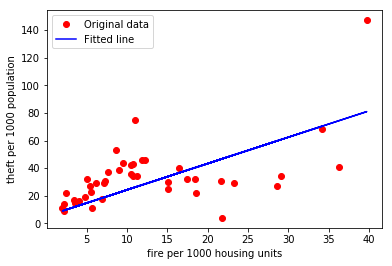

In [19]:
with tf.Session() as session:
    '''
    Step 7: Initialize the necessary variables, i.e. theta0 and theta1
    '''
    session.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/linear_regression', session.graph)

    '''
    Step 8: Train the models for 1000 epoches(รอบ)
    การทำงานแต่ละรอบก็จะ update ค่าความชันไปใหม่
    '''
    for i in range(1000):
        #session.run(optimizer, feed_dict={X:area, Y: price}) #optimizer = node
        #cost = session.run(loss_function, feed_dict={X: area, Y:price})
        session.run(optimizer, feed_dict = {X: data.T[0], Y:data.T[1]}) #ทำ Data เป็นแนวนอน => จะได้มองเป็น Array
        cost = session.run([loss_function], feed_dict = {X: data.T[0], Y:data.T[1]})
        
        print("Epoch: {0}, cost = {1}, theta0 = {2}, theta1 = {3}".format(i + 1, cost, session.run(theta0), session.run(theta1)))

    '''
    Step 9: Prints the training cost, theta0, and theta1
    '''
    print("Optimization Finished!")
    #training_cost = session.run(loss_function, feed_dict={X: area, Y: price})
    #print("Training cost =", training_cost, "theta0 = ", session.run(theta0), "theta1 = ", session.run(theta1), '\n')
    training_cost = session.run(loss_function,feed_dict={X:data.T[0], Y:data.T[1]})
    print("Cost =", training_cost, "theta0 = ", session.run(theta0), "theta1 = ", session.run(theta1), "\n")


    '''
    Step 10: Plot the results
    '''
    # Graphic display #
    #plt.plot(area, price, 'ro', label='Original data')
    #plt.plot(area, session.run(theta1) * area + session.run(theta0), 'b', label='Fitted line')
    #plt.xlabel('Area (in 10 m^2)')
    #plt.ylabel('Price (in MB)')
    #plt.legend()
    #plt.show()
    
    # Graphic display #
    plt.plot(data.T[0], data.T[1], 'ro', label='Original data')
    plt.plot(data.T[0], session.run(theta0) + session.run(theta1) * data.T[0], 'b', label='Fitted line')
    plt.xlabel('fire per 1000 housing units')
    plt.ylabel('theft per 1000 population')
    plt.legend()
    plt.show()

# Close the writer when you finished using it #
writer.close()


In [ ]:
#install jupyter-tensorboard
#!tensorboard --logdir ./graphs/linear_regression